# Проверĸа гипотез по увеличению выручĸи в интернет-магазине — оценить результаты A/B теста

# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Описание данных

#### Данные для первой части

Файл hypothesis.csv

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части
Файл orders.csv

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл visitors.csv

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
pd.set_option('display.max_colwidth', 150)

In [2]:
# hypothesis = pd.read_csv('datasets/hypothesis.csv')
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# приведем названия колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [3]:
# Добавим номер гипотезы
hypothesis = hypothesis.rename(index = lambda x: x+1)
hypothesis.index = 'Гипотеза ' + hypothesis.index.astype(str)# + ': ' + hypothesis['hypothesis']
hypothesis

,hypothesis,reach,impact,confidence,efforts
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Применим фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)
hypothesis[['hypothesis','ICE']].sort_values('ICE',ascending=False)

,hypothesis,ICE
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [5]:
# Применим фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values('RICE',ascending=False)

,hypothesis,RICE
Гипотеза 8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
Гипотеза 3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
Гипотеза 1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
Гипотеза 7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
Гипотеза 9,"Запустить акцию, дающую скидку на товар в день рождения",16.2
Гипотеза 4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
Гипотеза 2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
Гипотеза 6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
Гипотеза 5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


#### Вывод

При применении метода `ICE` на первом месте гипотезы: 9, 1, 8. При применении `RICE` на первом месте гипотезы: 8, 3, 1. 
Метод `RICE`, в отличии от `ICE`, включает в себя дополнительный параметр `'reach'`, отвечающий за охват пользователей.

Например, при оценке методом `RICE`, на первом месте гипотеза 8, её оценка более чем в 2 раза выше следующей гипотезы 3. 
Что является результатом высоких показателей охвата пользователей(`'reach'`), силы влияния на пользователей(`'impact'`), уверенностью в оценках(`'confidence'`) и средним показателем трудозатрат(`'efforts'`).

В методе `ICE` охват пользователей(`'reach'`) не учитывается и гипотеза 8 оказалась только на 3 месте.

Наиболее приоритетными будут гипотезы 8,3 и 1.

### Часть 2. Анализ A/B-теста

In [6]:
orders, visitors = (
#     pd.read_csv('datasets/orders.csv'),
#     pd.read_csv('datasets/visitors.csv')

    pd.read_csv('/datasets/orders.csv'),
    pd.read_csv('/datasets/visitors.csv')
)

In [7]:
def research(data_file):
    print(f'Колонок: {data_file.shape[1]}\nCтрок: {data_file.shape[0]}')
    print()
    print('Типы данных в колонках:')
    print(data_file.dtypes)
    print()
    print('Количество пропусков:', data_file.isna().sum().sum())
    print('Количество дубликатов:', data_file.duplicated().sum())
    print('*'*50)

In [8]:
for data in orders, visitors:
    display(data.head())
    research(data)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Колонок: 5
Cтрок: 1197

Типы данных в колонках:
transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

Количество пропусков: 0
Количество дубликатов: 0
**************************************************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Колонок: 3
Cтрок: 62

Типы данных в колонках:
date        object
group       object
visitors     int64
dtype: object

Количество пропусков: 0
Количество дубликатов: 0
**************************************************


In [9]:
# преобразование данных о времени
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [10]:
# проверим пересечения в группах
group_a = orders.query('group == "A"') 
group_b = orders.query('group == "B"')
  
# получаем пользователей, попавших в обе группы 
group_intersections = list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

In [11]:
# исключим пользователей с пересечением в группах
orders = orders.query('visitorId not in @group_intersections')

##### Вывод:

Загрузили данные, пропусков и дубликатов нет.
Обнаружили 58 пользователей числищихся в обоих группах, пересечения исключили.
Представленная информация позволит нам провести анализ и сделать выводы.

### Стабильность кумулятивных метрик

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [13]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : 'nunique', 
          'visitorId' : 'nunique', 
          'revenue' : 'sum'}), 
    axis=1,
).sort_values(by=['date','group'])

In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Получим таблицу `cumulativeData` где:
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;

- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

### График кумулятивной выручки по дням и группам A/B-тестирования

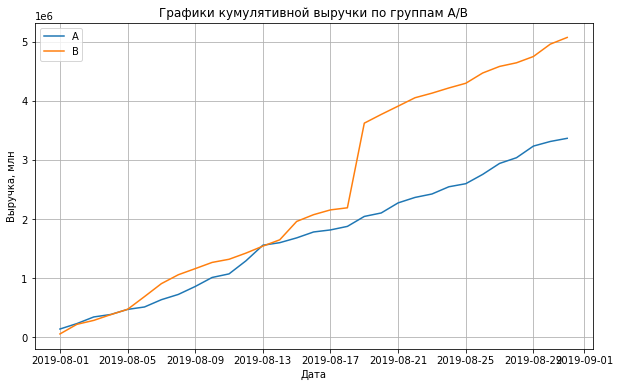

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.ylabel('Выручка, млн')
plt.xlabel('Дата')
plt.title('Графики кумулятивной выручки по группам A/B')
plt.legend()
plt.grid()

#plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 8, 31), 0, 6000000])

##### Вывод

Выручка группы В выше группы А. Графики выручки групп А растет равномерно, группы В в одной точке резко растёт. Это может сигнализировать о росте числа заказов, либо о появлении очень дорогих заказов в выборке.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

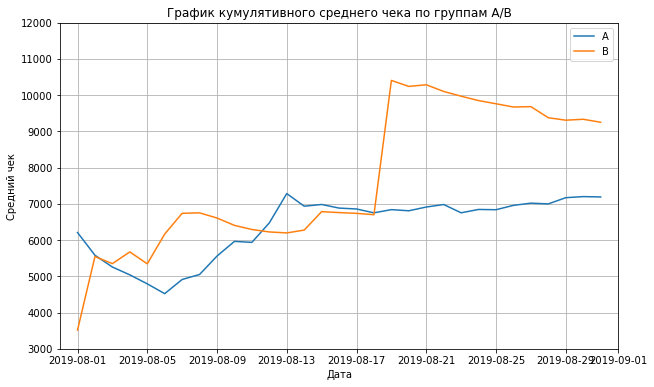

In [17]:
plt.figure(figsize=(10,6))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 3000,12000])

plt.title('График кумулятивного среднего чека по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.grid()

##### Вывод

Средний чек становится равномерным от середины для группы A и резко вырастает и начинает падать для группы B. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

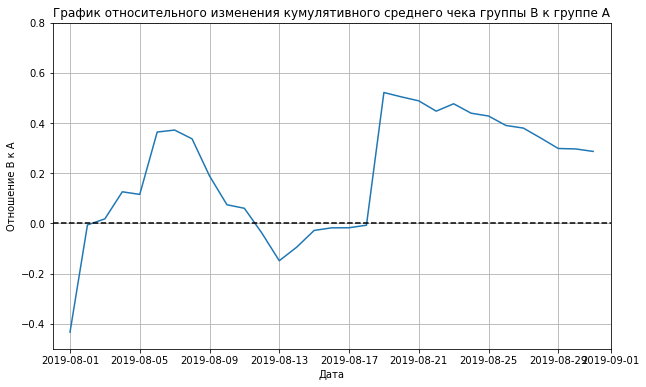

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])


plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.5, 0.8])

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение В к А')
plt.grid()

##### Вывод

График подтверждает предыдущие выводы. По ссотношению средних чеков видно, что в группу B попали крупные заказы (резкий всплеск на графике).

### График кумулятивной конверсии по группам

Проанализируем график кумулятивной конверсии. Передадим ему минимальное и максимальное значения оси x и оси y.

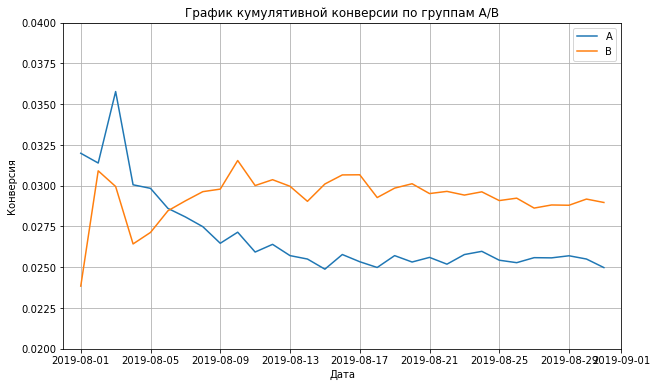

In [47]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), 0.02, 0.04])

plt.title('График кумулятивной конверсии по группам A/B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.legend()
plt.show()

##### Вывод

Значения конверсии по группам сначала пересекаются, затем расходятся, конверсия группы В выше чем А, затем они фиксируются примерно в одном положении.

### График относительного изменения кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий:

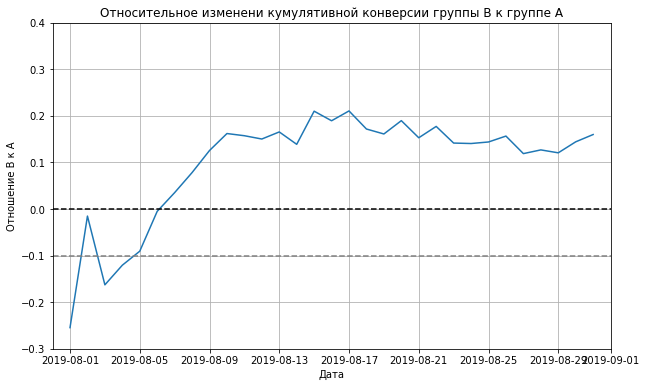

In [20]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['A', 'B'])
                              )

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], (
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA'])-1)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Отношение В к А')

plt.axis([dt.datetime(2019, 7, 31), dt.datetime(2019, 9, 1), -0.3, 0.4])
plt.title('Относительное изменени кумулятивной конверсии группы B к группе A')
plt.grid()

#### Вывод

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. После рывка её конверсия постепенно падает.
Стоит проанализировать аномалии, возможно, они изменят картину.

### Точечный график количества заказов по пользователям

In [21]:
# количество заказов по пользователям
ordersByUsers = (orders.groupby('visitorId', as_index=False)
                 .agg({'transactionId' : 'nunique',})
                 .rename(columns={'visitorId':'users','transactionId':'orders'})
                 .sort_values(by='orders',ascending=False)
                )

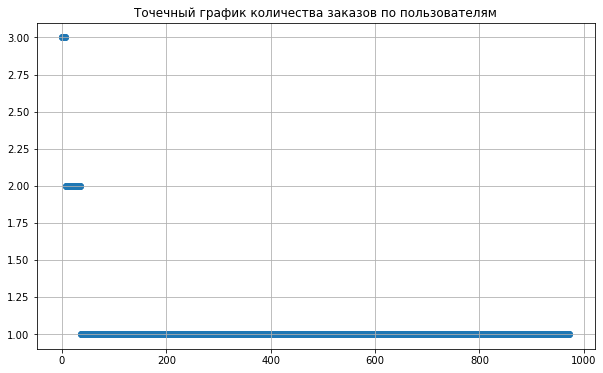

In [22]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(10,6))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.grid()

##### Вывод

Большинство пользователи делают 1 заказ, незначительное количество по 2 заказа и единицы больше.

### 95-й и 99-й перцентили количества заказов на пользователя

In [23]:
abnormal_order = np.percentile(ordersByUsers['orders'], [95, 99])
abnormal_order

array([1., 2.])

In [24]:
abnormal_order_limit = abnormal_order[1]

## Вывод

Не более 1% пользователей делают более 2 заказов и не более 5 % делают более 2 заказа. Выберем 2 заказа как границу аномальных пользователей.

### Точечный график стоимостей заказов

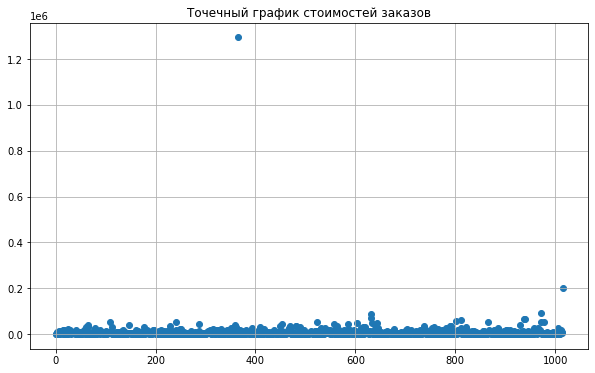

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
#plt.axis([-10, 1210, 0, 250000])
plt.grid()

#### Вывод

Сумма заказа в основном не превышает 50 000 ден.ед.

### 95-й и 99-й перцентили стоимости заказов

In [26]:
abnormal_revenue = np.percentile(orders['revenue'], [95, 99])
abnormal_revenue

array([26785., 53904.])

In [27]:
abnormal_revenue_limit = abnormal_revenue[1]

##### Вывод

Не более 1% заказов превышат сумму 53904 ден.ед и не более 5 % - 28000 ден.ед. Выберем 53904 ден.ед как границу аномальных заказов.

### Статистическая значимость различий в конверсии между группами по «сырым» данным.

Сформулируем гипотезы. 

    Нулевая: различий в конверсии между группами нет. 
    Альтернативная: различия в конверсии между группами есть.

In [28]:
# сгруппируем посетителей по дням и получим кумулятивные данные о посетителях по группе А 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [29]:
# сгруппируем посетителей по дням и получим кумулятивные данные о посетителях по группе В 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [30]:
# сгруппируем количество заказов и выручку по дням и получим кумулятивные данные по группе А 
ordersADaily = (orders.query('group == "A"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

In [31]:
# сгруппируем количество заказов и выручку по дням и получим кумулятивные данные по группе B
ordersBDaily = (orders.query('group == "B"')
                 .groupby('date', as_index=False)
                 .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

Объединим данные в единую таблицу где:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;

- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;

- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [32]:
# объединим данные в единую таблицу
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [33]:
# сгруппируем заказы по пользователям для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# сгруппируем заказы по пользователям для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [34]:
# выделим всех пользователей и число заказов для каждого в тч 0
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                                 ), name='orders')
    ],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                                 ), name='orders')
    ],axis=0)

In [35]:
# Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


##### Вывод

p-value меньше 0,05 поэтому нулевую гипотезу отвергаем - статистически значимые **различия** в конверсии между группами **есть**. Относительный прирост конверсии группы В к группе А равен 16%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [36]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


##### Вывод

p-value больше 0,05 не отвергаем нулевую гипотезу- статистически значимых **различий** в конверсии между группами **нет**. Относительное различие среднего чека между группами 28,7%

### Cтатистическая значимость различий в конверсии между группами по «очищенным» данным

Ранее мы определили границу количества аномальных заказов - 4, границу суммы аномальных заказов - 53904 ден.ед.
Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 53904 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`

In [37]:
display(abnormal_order_limit)
abnormal_revenue_limit

2.0

53904.0

In [38]:

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > abnormal_order_limit]['userId'],
     ordersByUsersB[ordersByUsersB['orders'] > abnormal_order_limit]['userId'],
    ],axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > abnormal_revenue_limit]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormalUsers.head())
print(abnormalUsers.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


##### Вывод 

Всего 16 аномальных пользователя

In [39]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
                   ]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
                   ]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

In [40]:
# статистический критерий Манна-Уитни
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.189


##### Вывод

p-value меньше 0,05 - **различия есть**. Как и в случае с "сырыми" данными, в "очищенных" данных статистическая значимость достигнута,сегмент группы В лучше сегмента А. Относительный прирост конверсии группы В к группе А равен 18,9%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [41]:
print('{0:.3f}'.format(
    stats.mannwhitneyu(orders[
        np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'], 
                       orders[
        np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'])[1]))

print("{0:.3f}".format(orders[
        np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'].mean()
        / orders[
        np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers))
                      )]['revenue'].mean() - 1))

0.788
-0.032


##### Вывод

Анализ "очищенных" данных показывает, что в среднем чеке статистических значимых **различий** между группами **нет**. Относительное различие среднего чека между группами -3,2%

### Решение по результатам теста

Графики кумулятивной выручки и кумулятиного среднего чека показали, что группа В эффективнее групапы А, выручка выше и средний чек больше. Конверсия по группе В так же выше. Мы предположили, что в данных есть выбросы.

Статистическая значимость на "сырых" данных показала, что:
- различия в конверсии между группами есть, 
- а в среднем чеке нет

и "очищенные" данные показали, что:
- различия в конверсии между группами есть, 
- а в среднем чеке нет.

Можем сделать вывод, что резудьтаты группы В превышают результаты группы А. Следует зафиксировать победу группы В и остановить тест.